# Env Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np

# Load a sample

In [0]:
#laoding one sample file 
y, sr = librosa.core.load("/content/drive/My Drive/SER/sample.wav", res_type='kaiser_fast',sr=22050)



# Waveform



Text(0.5, 1.0, 'Harmonic + Percussive Waveform')

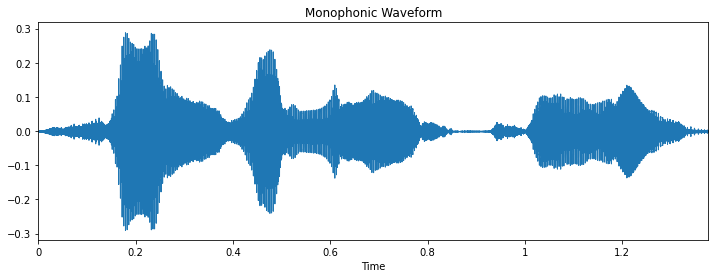

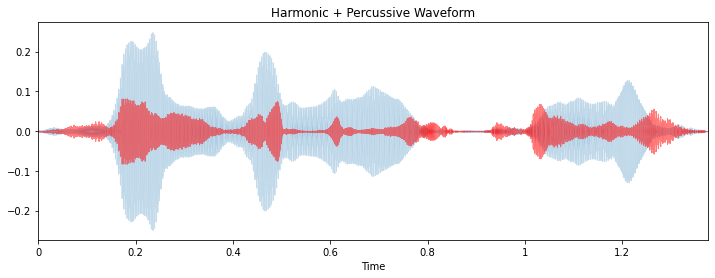

In [4]:
#plotting Monophonic Waveform
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic Waveform')

#plotting Harmonic + Percussive Waveform
y_harm, y_perc = librosa.effects.hpss(y)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive Waveform')



# mel Spectrogram




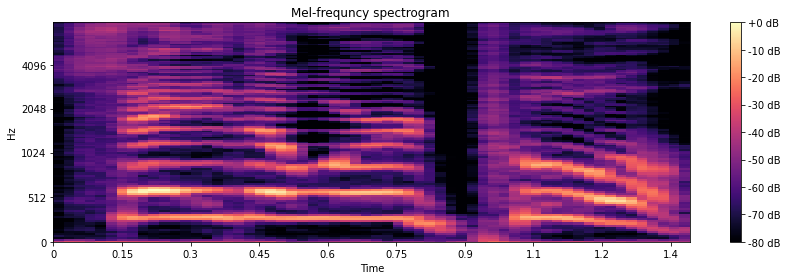

In [5]:
# Plotting Mel frequency Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel',fmax=8000)
plt.title('Mel-frequncy spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


# MFCC plot


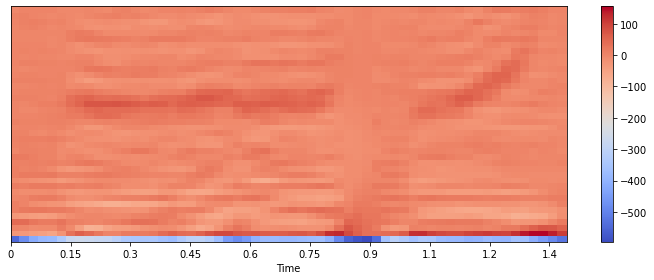

In [6]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')#,y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.show()

# Chromagram



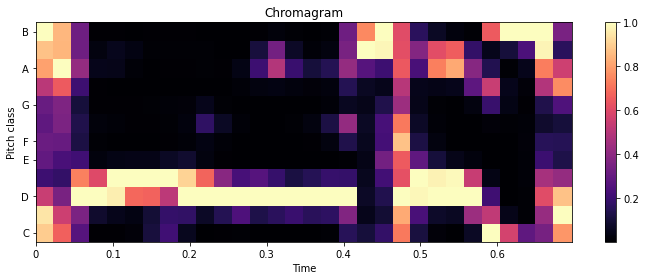

In [7]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()